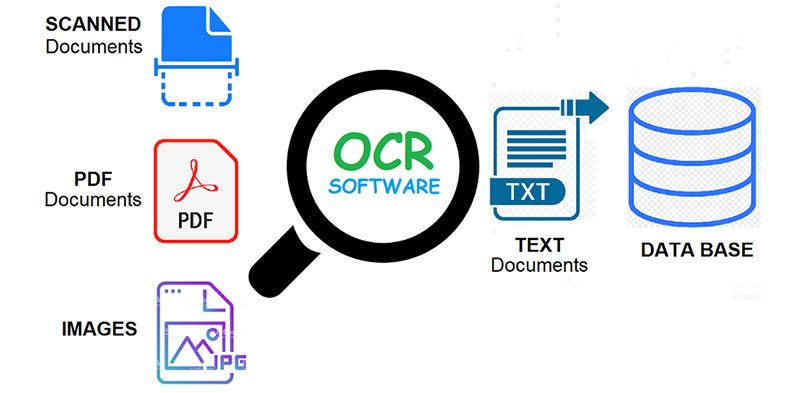

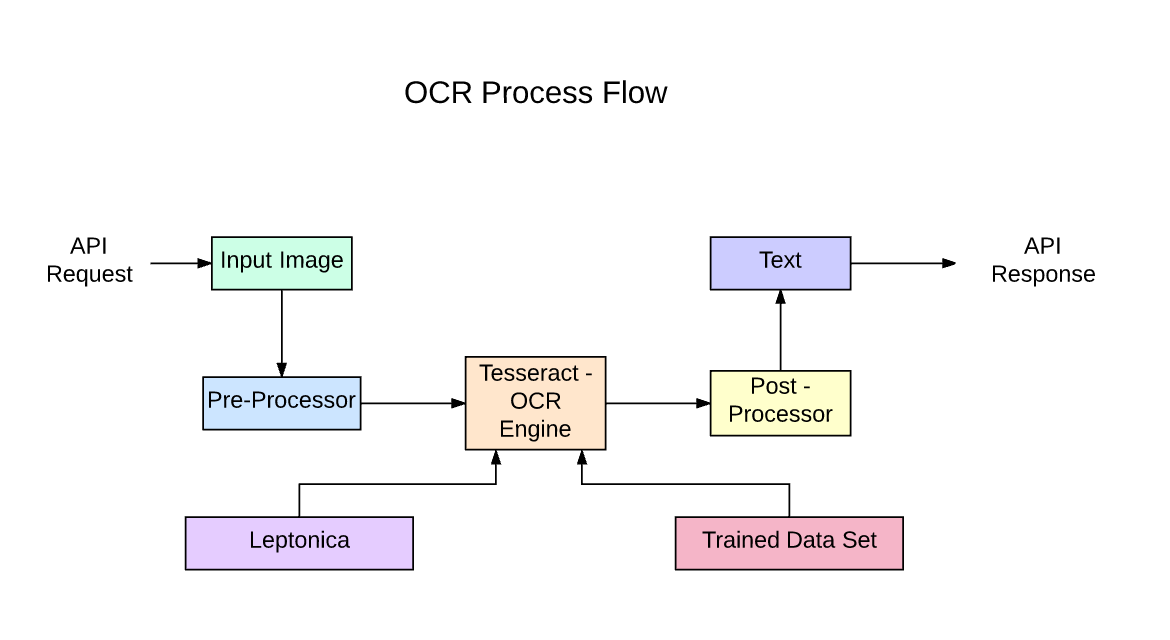

 OCRopus' Python-based LSTM
 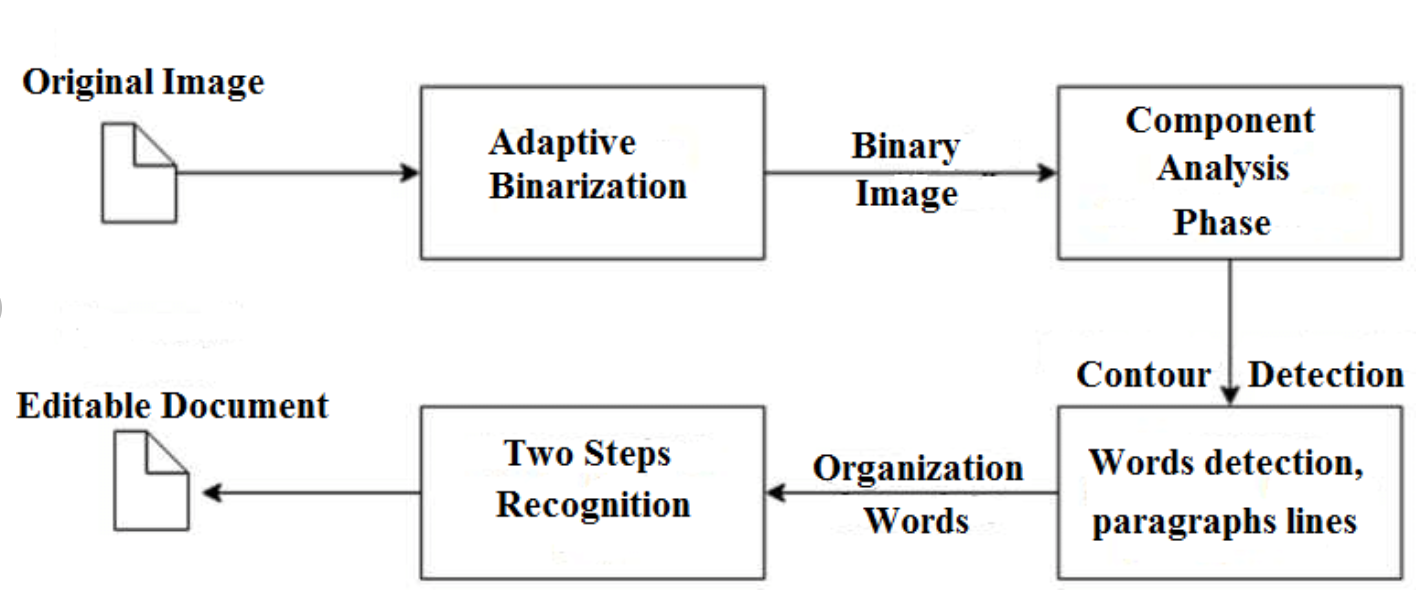

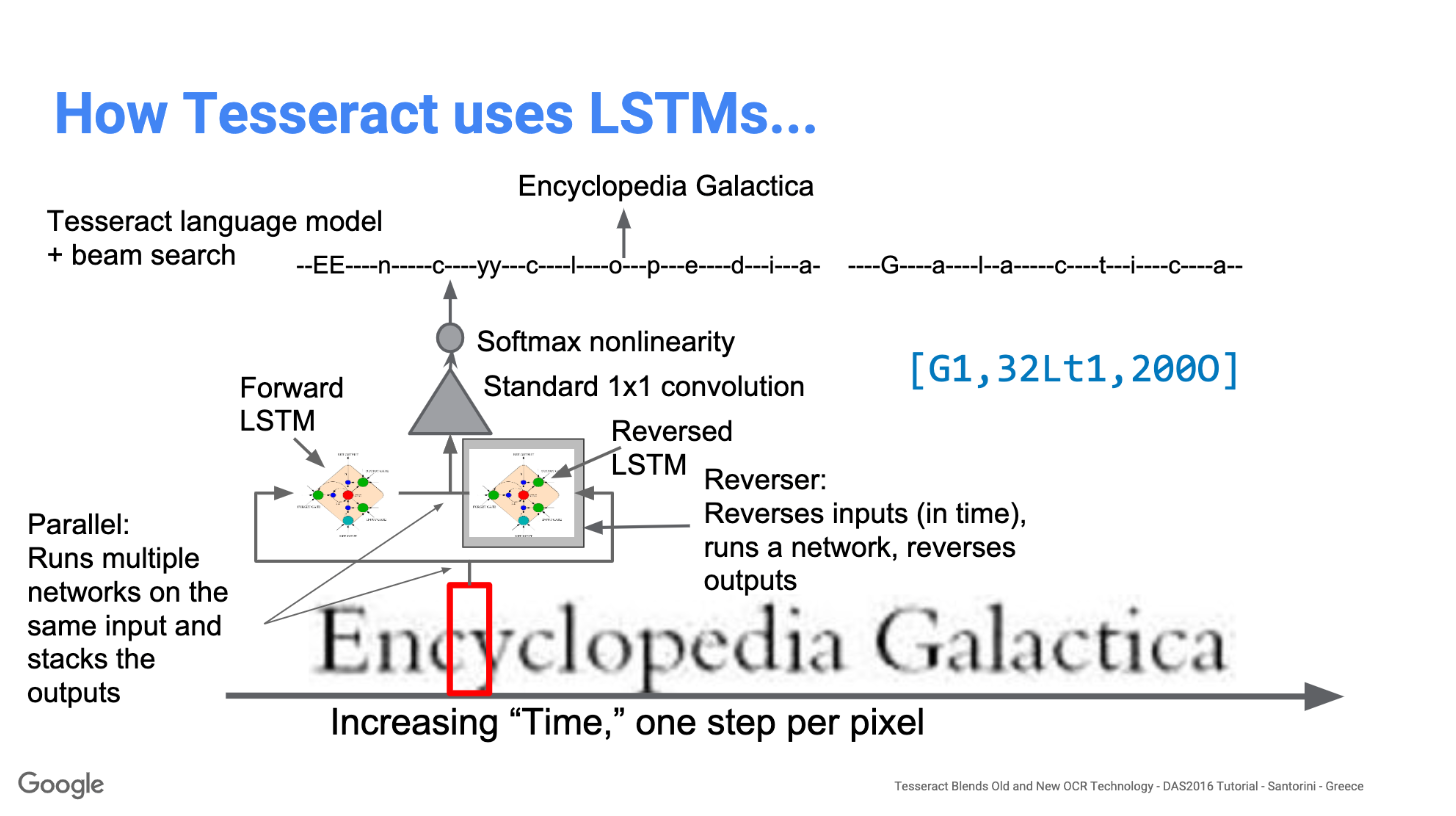

In [1]:
!tesseract --version

tesseract 4.1.1
 leptonica-1.79.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 2.0.3) : libpng 1.6.37 : libtiff 4.1.0 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.1
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.4.0 zlib/1.2.11 liblzma/5.2.4 bz2lib/1.0.8 liblz4/1.9.2 libzstd/1.4.4


In [2]:
!apt install curl -y
!curl https://media.geeksforgeeks.org/wp-content/uploads/20201218171110/sampletext.png -o text-image.png

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.68.0-1ubuntu2.21).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20798  100 20798    0     0   159k      0 --:--:-- --:--:-- --:--:--  159k


In [3]:
import cv2 
import pytesseract

img = cv2.imread('text-image.png')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'now children state should after above same long made such\npoint run take call together few being would walk give\n\x0c'

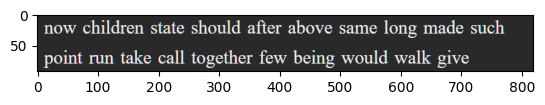

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)

Preprocessing for Tesseract
To avoid all the ways your tesseract output accuracy can drop, you need to make sure the image is appropriately pre-processed.

This includes rescaling, binarization, noise removal, deskewing, etc.

To preprocess image for OCR, use any of the following python functions.

In [5]:
!curl  https://nanonets.com/blog/content/images/2019/12/image.jpg -o ocr-image.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0
curl: (35) OpenSSL SSL_connect: SSL_ERROR_SYSCALL in connection to nanonets.com:443 


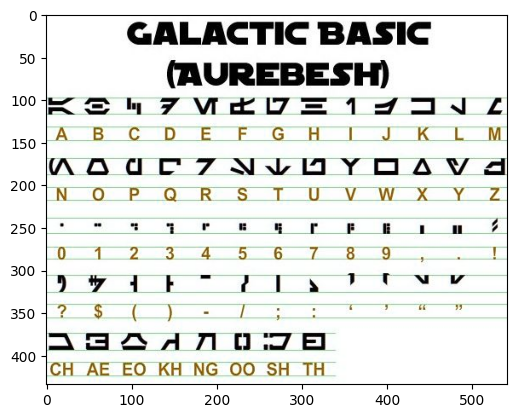

In [23]:
import cv2
import numpy as np

img = cv2.imread('ocr-image.jpg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

plt.imshow(img)

In [24]:
image = cv2.imread('ocr-image.jpg')


gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)


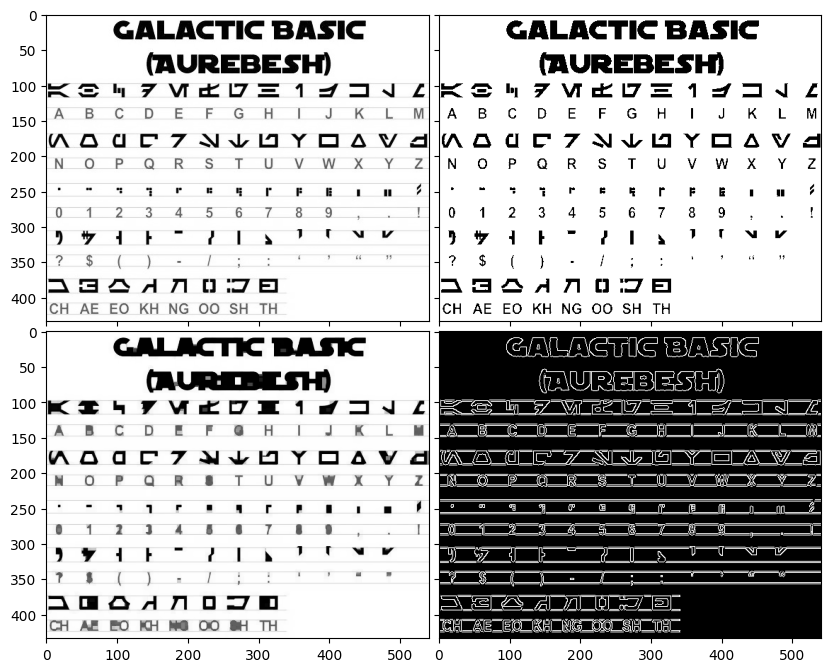

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

im1 = gray
im2 = thresh
im3 = opening
im4 = canny

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im,cmap='Greys_r')

plt.show()

In [28]:
text=pytesseract.image_to_string(gray, config=custom_config)
print(text)

GALACTIC BASIC
(AUREBESH)
REehHTFVMVEVEITZIoIN EL
A 2S > EE eS A ek oe
AOder7NVYoYoAVaA
NOP RS Tn wee
‘ss 4 oe 8 g Pf fF f 4 mw 4
Sea
7 77 Ty
2S ys ee
ASaSAnNADI
CH AE EO KH NG OO SH TH



In [29]:
text=pytesseract.image_to_string(thresh, config=custom_config)
print(text)

GALACTIC BASIC
(AVREBESH)

RS 7FVMeEVEi1i fol Z
A B C DE F GH IJ K LM
AOdCeUT7TNVTOoOYOAVA
N OO P Q@R S$ TU VW XK Y¥ Z
"os 3 3 rm 8 fo Pf F Bo a om #
0 12 3 4 5 6 7 8 9 , . !
i A rd re
2 S$ ( Foe Fo gor ht roe
AadSANDIe
CH AE EO KH NG OO SH TH



In [30]:
text=pytesseract.image_to_string(opening, config=custom_config)
print(text)

GALACTIC BASIC
(AUREZBEILSH)
KEE VTMEUEiwoayvs
A BC D FE F @ H [| J K CL
AOadr7WTt HYOAYV 4
WO P Q R 8S T U VW WK y Z
‘5 a aor es ln lp le ce
1 2 a a4 8 8 7 Sb Ps,
VY itr-~ -yrp»pTttYY
2 ty ee eg Ee Se
AGoOAnNnoOIH
CH AE BO KH @@ OO BH TH



In [31]:
text=pytesseract.image_to_string(canny, config=custom_config)
print(text)

CAA Cnr ASG
(KUREBESE?
SA
a SS
{o_o RS a
a
a a A : rc
| A |
a
eA Ao
erm emc om Cm cuOcmc (mim



Getting boxes around text

Using Pytesseract, you can get the bounding box information for your OCR results using the following code.

The script below will give you bounding box information for each character detected by tesseract during OCR.

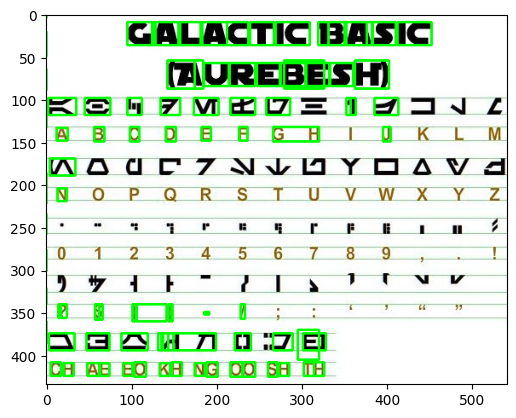

In [32]:
import cv2
import pytesseract


h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

plt.imshow( img)


In [34]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('ocr-invoice.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


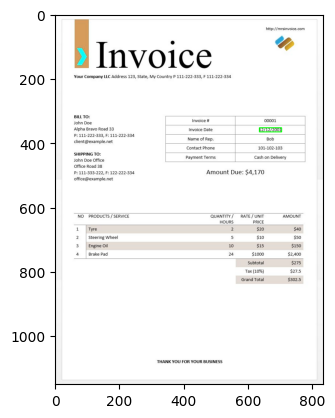

In [36]:
import re
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('ocr-invoice.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow( img)


Page segmentation modes
There are several ways a page of text can be analysed. The tesseract api provides several page segmentation modes if you want to run OCR on only a small region or in different orientations, etc.

Here's a list of the supported page segmentation modes by tesseract -

0    Orientation and script detection (OSD) only.
1    Automatic page segmentation with OSD.
2    Automatic page segmentation, but no OSD, or OCR.
3    Fully automatic page segmentation, but no OSD. (Default)
4    Assume a single column of text of variable sizes.
5    Assume a single uniform block of vertically aligned text.
6    Assume a single uniform block of text.
7    Treat the image as a single text line.
8    Treat the image as a single word.
9    Treat the image as a single word in a circle.
10    Treat the image as a single character.
11    Sparse text. Find as much text as possible in no particular order.
12    Sparse text with OSD.
13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

To change your page segmentation mode, change the --psm argument in your custom config string to any of the above mentioned mode codes.



Detect orientation and script

You can detect the orientation of text in your image and also the script in which it is written. The following image -


In [40]:
help(pytesseract.image_to_osd)

Help on function image_to_osd in module pytesseract.pytesseract:

image_to_osd(image, lang='osd', config='', nice=0, output_type='string', timeout=0)
    Returns string containing the orientation and script detection (OSD)



angle:  90
no script


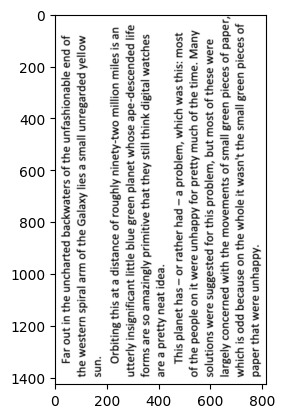

In [41]:
img = cv2.imread('90degrees-1.png')
plt.imshow(img)
osd = pytesseract.image_to_osd(img)
angle = re.search('(?<=Rotate: )\d+', osd).group(0)
print("angle: ", angle)
try:
    script = re.search('(?<=Script: )\d+', osd).group(0)
    print("script: ", script)
except AttributeError:    
    print("no script")

In [42]:
help(re.search)

Help on function search in module re:

search(pattern, string, flags=0)
    Scan through string looking for a match to the pattern, returning
    a Match object, or None if no match was found.



Detect only digits

Take this image for example -

In [45]:
import cv2 
import pytesseract

img = cv2.imread('alpha-digit.jpg')

# Adding custom options
#custom_config = r'--oem 3 --psm 6'
custom_config = r'--oem 3 --psm 6 outputbase digits'
text=pytesseract.image_to_string(img, config=custom_config)
print(text)

--

. 43876324
172018.
0 176496234



Blacklisting characters    
If you are sure some characters or expressions definitely will not turn up in your text (the OCR will return wrong text in place of blacklisted characters otherwise), you can blacklist those characters by using the following config.

In [47]:
custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
text=pytesseract.image_to_string(img, config=custom_config)
print(text)

‘Customer name Halim Energy services
Project NEHINS-HIB-HSA
lavoice no ¢
Dated %h Nov%.
POno



Whitelisting characters    
Say you only want to detect certain characters from the given image and ignore the rest. You can specify your whitelist of characters (here, we have used all the lowercase characters from a to z only) by using the following config.

In [48]:
custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --psm 6'
text=print(pytesseract.image_to_string(img, config=custom_config))
print(text)

customernamealiumnergyservices
roject e
lavoiceno
ated thov
ono

None


In [49]:
!tesseract --list-langs

List of available languages (2):
eng
osd


Note - Only languages that have a .traineddata file format are supported by tesseract.

To specify the language you need your OCR output in, use the -l LANG argument in the config where LANG is the 3 letter code for what language you want to use.
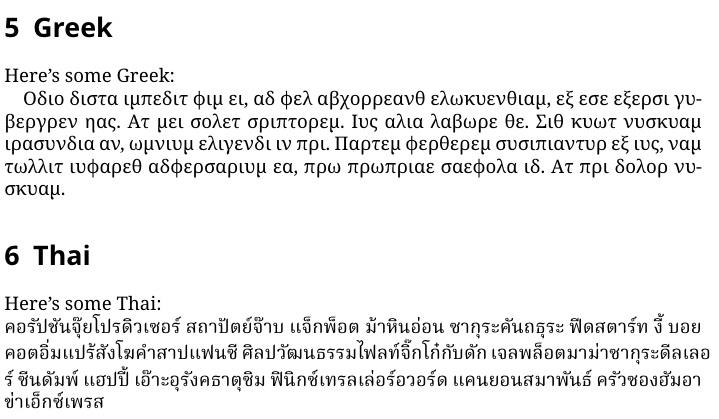

In [51]:
!apt-get install tesseract-ocr-lang

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package tesseract-ocr-lang is a virtual package provided by:
  tesseract-ocr-yor 1:4.00~git30-7274cfa-1
  tesseract-ocr-yid 1:4.00~git30-7274cfa-1
  tesseract-ocr-vie 1:4.00~git30-7274cfa-1
  tesseract-ocr-uzb-cyrl 1:4.00~git30-7274cfa-1
  tesseract-ocr-uzb 1:4.00~git30-7274cfa-1
  tesseract-ocr-urd 1:4.00~git30-7274cfa-1
  tesseract-ocr-ukr 1:4.00~git30-7274cfa-1
  tesseract-ocr-uig 1:4.00~git30-7274cfa-1
  tesseract-ocr-tur 1:4.00~git30-7274cfa-1
  tesseract-ocr-ton 1:4.00~git30-7274cfa-1
  tesseract-ocr-tir 1:4.00~git30-7274cfa-1
  tesseract-ocr-tha 1:4.00~git30-7274cfa-1
  tesseract-ocr-tgk 1:4.00~git30-7274cfa-1
  tesseract-ocr-tel 1:4.00~git30-7274cfa-1
  tesseract-ocr-tat 1:4.00~git30-7274cfa-1
  tesseract-ocr-tam 1:4.00~git30-7274cfa-1
  tesseract-ocr-syr 1:4.00~git30-7274cfa-1
  tesseract-ocr-swe 1:4.00~git30-7274cfa-1
  tesseract-ocr-swa 1:4.00~git30-7274cfa-1
  tesseract-ocr-sun 1

In [56]:
!apt-get install tesseract-ocr-grc tesseract-ocr-tha

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-grc tesseract-ocr-tha
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
Need to get 1815 kB of archives.
After this operation, 3348 kB of additional disk space will be used.
Get:1 http://mirrors.aliyun.com/ubuntu focal/universe amd64 tesseract-ocr-grc all 1:4.00~git30-7274cfa-1 [916 kB]
Get:2 http://mirrors.aliyun.com/ubuntu focal/universe amd64 tesseract-ocr-tha all 1:4.00~git30-7274cfa-1 [899 kB]
Fetched 1815 kB in 1s (1448 kB/s)         
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package tesseract-ocr-grc.
(Reading database ... 17797 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-grc_1%3a4.00~git30-7274cfa-1_all.deb ...
Unpacking tesseract-ocr-grc (1:4.00~git30-7274cfa-1) ...
Selecting previously unselected package tes

In [58]:
img = cv2.imread('gre-tha.png')
custom_config = r'-l grc+tha+eng --psm 6'
text=pytesseract.image_to_string(img, config=custom_config)
print(text)

5 Greek
Here’s some Greek:

Οδιο διστα ιμπεδιτ φιμ ει, αδ φελ αβχορρεανθ ελωκυενθιαμ, εξ εσε εξερσι γυ-
βεργρεν ηας. Ατ μει σολετ σριπτορεμ. ἴυς αλια λαβωρε θε. Σιθ κυωτ νυσκυαμ
τρασυνδια αν, ὠμνιυμ ελιγενδι τιν πρι. Παρτεμ φερθερεμ συσιπιαντὺυρ εξ ιυς,ναμ
%0790 แ ร เง ๑ ๕ 80 ๕ 6 ๑ อ 06 ส 0 เง น อ ๓ , πρω πρωπριαε σαεφολα ιδ. Ατ πρι δολορ νυ-
σκυαμ.

6 Thai

Here’s some Thai: ν᾿

ค อ ร ั ป ซั น จ ุ ้ ย โป ร ด ิ ว เซ อ ร ์ ส ถา ป ั ต ย ์ จ ๊ า บ แจ ็ ก พ ็ อ ต ม ้ า ห ิ น อ ่ อ น ซา ก ุ ร ะ ค ั น ถ ธ ุ ร ะ ฟิ ด ส ต า ร ์ ท ง ี ้ บ อ ย
ค อ ต อ ื ่ ม แป ร ั ส ั ง โฆ ค ํ า ส า ป แฟ น ซี ศิ ล ป ว ั ฒ น ธร ร ม ไฟ ล ท ์ จ ิ ๊ ก โก ๋ ก ั บ ด ั ก เจ ล พ ล ็ อ ต ม า ม ่ า ซา ก ุ ร ะ ด ี ล เล อ
ร ์ ซี น ด ั ม พ ์ แฮ ป ป ี ้ เอ ๊ ้ า ะ อ ุ ร ั ง ค ธา ต ุ ซิ ม ฟิ น ิ ก ซ์ เท ร ล เล ่ อ ร ์ อ ว อ ร ์ ด แค น ย อ น ส ม า พ ั น ธ์ ค ร ั ว ซอ ง ฮั ม อ า
ข่ า เอ ็ ก ซ์ เพ ร ส



In [60]:
!pip install langdetect

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 981 kB 1.5 MB/s eta 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=0b92b6625a24d9635c54c1f0f5ae8426297fcece6af5b09c1e17f87d10aff2e3
  Stored in directory: /root/.cache/pip/wheels/06/06/5f/64c804cc5f455f61a076010ae839eed9fa7eef4c647e36924d
Successfully built langdetect


In [61]:
from langdetect import detect_langs
detect_langs(text)

[th:0.8571433054378065, el:0.14285669450797023]

Note - Tesseract performs badly when, in an image with multiple languages, the languages specified in the config are wrong or aren't mentioned at all. This can mislead the langdetect module quite a bit as well.

### Training Tesseract on custom data
Tesseract 4.00 includes a new **neural network-based recognition engine** that delivers significantly higher accuracy on document images. Neural networks require significantly more training data and train a lot slower than base Tesseract. For Latin-based languages, the existing model data provided has been trained on about 400000 text lines spanning about 4500 fonts.

In order to successfully run the Tesseract 4.0 LSTM training tutorial, you need to have a working installation of Tesseract 4 and Tesseract 4 Training Tools and also have the training scripts and required trained data files in certain directories. Visit github repo for files and tools.

Tesseract 4.00 takes a few days to a couple of weeks for training from scratch. Even with all these new training data, therefore here are few options for training:

-**Fine-tune** - Starting with an existing trained language, train on your specific additional data. For example training on a handwritten dataset and some additional fonts.

-**Cut off the top layer** - from the network and retrain a new top layer using the new data. If fine-tuning doesn't work, this is most likely the next best option. The analogy why is this useful, take for an instance models trained on ImageNet dataset. The goal is to build a cat or dog classifier, lower layers in the model are good at low-level abstraction as corners, horizontal and vertical lines, but higher layers in model are combining those features and detecting cat or dog ears, eyes, nose and so on. By retraining only top layers you are using knowledge from lower layers and combining with your new different dataset.

-**Retrain from scratch** - This is a very slow approach unless you have a very representative and sufficiently large training set for your problem. The best resource for training from scratch is following this github repo.
A guide on how to train on your custom data and create .traineddata files can be found https://pretius.com/how-to-prepare-training-files-for-tesseract-ocr-and-improve-characters-recognition/ and https://medium.com/@vovaprivalov/tesseract-ocr-tips-custom-dictionary-to-improve-ocr-d2b9cd17850b.

We will not be covering the code for training using Tesseract in this blog post.

### Limitations of Tesseract
Tesseract works best when there is a clean segmentation of the foreground text from the background. In practice, it can be extremely challenging to guarantee these types of setup. There are a variety of reasons you might not get good quality output from Tesseract like if the image has noise on the background. The better the image quality (size, contrast, lightning) the better the recognition result. It requires a bit of preprocessing to improve the OCR results, images need to be scaled appropriately, have as much image contrast as possible, and the text must be horizontally aligned. Tesseract OCR is quite powerful but does have the following limitations.

**Tesseract limitations summed in the list.**

- The OCR is not as accurate as some commercial solutions available to us.
- Doesn't do well with images affected by artifacts including partial occlusion, distorted perspective, and complex background.
- It is not capable of recognizing handwriting.
- It may find gibberish and report this as OCR output.
- If a document contains languages outside of those given in the -l LANG arguments, results may be poor.
- It is not always good at analyzing the natural reading order of documents. For example, it may fail to recognize that a document contains two columns, and may try to join text across columns.

- Poor quality scans may produce poor quality OCR.

- It does not expose information about what font family text belongs to.

### Conclusion
Just as deep learning has impacted nearly every facet of computer vision, the same is true for character recognition and handwriting recognition. Deep learning based models have managed to obtain unprecedented text recognition accuracy, far beyond traditional information extraction and machine learning image processing approaches.

Tesseract performs well when document images follow the next guidlines :

* Clean segmentation of the foreground text from backgroundkgr
* Horizontally aligned and scaled apopriately
* High-quality image without blurriess and noise


The latest release of Tesseract 4.0 supports deep learning based OCR that is significantly more accurate. The OCR engine itself is built on a Long Short-Term Memory (LSTM) network, a kind of Recurrent Neural Network (RNN).

Tesseract is perfect for scanning clean documents and comes with pretty high accuracy and font variability since its training was comprehensive. I would say that Tesseract is a go-to tool if your task is scanning of books, documents and printed text on a clean white background.ackground.ackground.